In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.preprocessing import MinMaxScaler
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import VotingClassifier

In [2]:
def cfm_plot(y_true,y_pred):
    plt.figure(figsize=(6,6))
    cm = confusion_matrix(y_true,y_pred)
    #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df = pd.DataFrame(cm)
    df = df.applymap(lambda x : round(x,2))
    #plt.imshow(df, cmap='hot', interpolation='nearest')
    sn.heatmap(df,annot = True,annot_kws={"size": 12})
    plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape((60000,-1))
print(x_train.shape)

x_test = x_test.reshape((10000,-1))
print(x_test.shape)


(60000, 784)
(10000, 784)


In [6]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [9]:
batch_size = 32
es = EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)
callbacks = [es]
model.fit(x_train,y_train,epochs=50, batch_size=batch_size, callbacks=callbacks)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2514 - acc: 0.9215
Epoch 2/50
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1066 - acc: 0.9680
Epoch 3/50
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0797 - acc: 0.9768
Epoch 4/50
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0646 - acc: 0.9805
Epoch 5/50
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0522 - acc: 0.9848
Epoch 6/50
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0474 - acc: 0.9863
Epoch 7/50
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0375 - acc: 0.9893
Epoch 8/50
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0346 - acc: 0.9902
Epoch 9/50
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0311 - acc: 0.9906
Epoch 10/50
60000/60000 [==============================] -

In [10]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.1101 - acc: 0.9790


[0.11013132302096455, 0.979]

[7 2 1 ... 4 5 6]


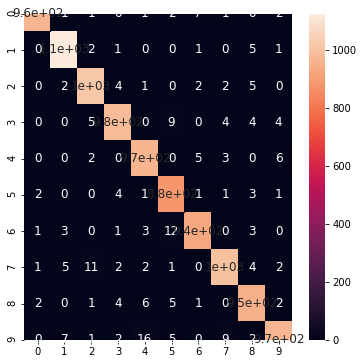

In [11]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
#tensorflow.confusion_matrix(y_test,y_pred)
cfm_plot(y_test,y_pred)

acc= 0.93
[[ 955    0    2    4    1   10    4    3    1    0]
 [   0 1110    5    2    0    2    3    2   11    0]
 [   6    9  930   14   10    3   12   10   34    4]
 [   4    1   16  925    1   23    2   10   19    9]
 [   1    3    6    3  921    0    7    5    6   30]
 [   9    2    3   35   10  777   15    6   31    4]
 [   8    3    8    2    6   16  912    2    1    0]
 [   1    7   23    7    6    1    0  947    4   32]
 [   9   11    6   22    7   29   13   10  855   12]
 [   9    8    1    9   21    7    0   21    9  924]]


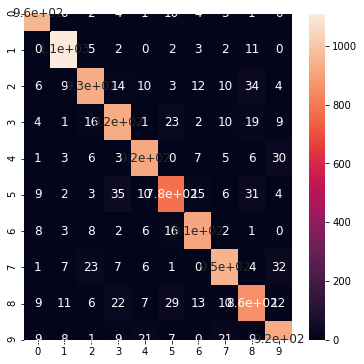

In [24]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('acc=',round(accuracy_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
cfm_plot(y_test,y_pred)

0.5544


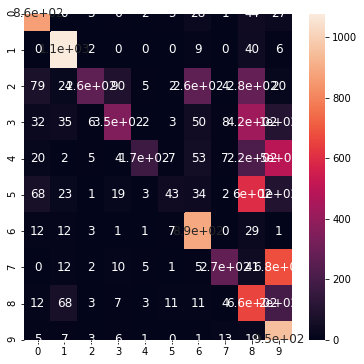

In [19]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm_plot(y_test,y_pred)

0.9605


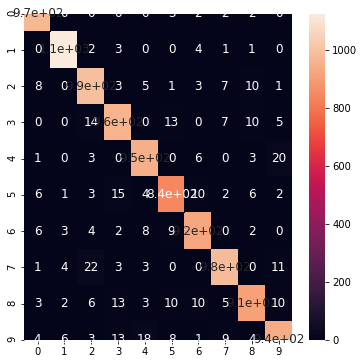

In [20]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm_plot(y_test,y_pred)

acc= 0.94
[[ 966    1    0    0    1    3    5    1    3    0]
 [   0 1119    2    2    0    1    3    0    7    1]
 [  14   11  952    6    2    0   12    7   26    2]
 [   7    4   15  947    1    4    2    7   16    7]
 [   5    3    3    2  916    0    6    1    6   40]
 [  19    6    1   32   14  781   12    2   19    6]
 [  10    4    3    1    4    8  925    0    3    0]
 [   2   10   28    6    5    1    0  944    1   31]
 [   8   11    8    9    9   14    7    6  885   17]
 [   9    9    3   10   12    2    0    5    7  952]]


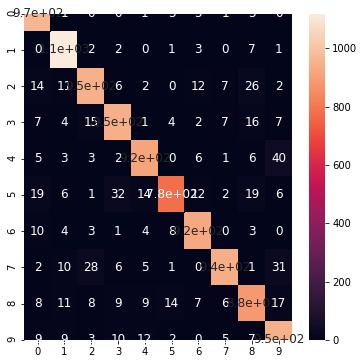

In [27]:
lr = LogisticRegression(max_iter=1000)
nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=20)
vc = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('nb', nb)])
vc.fit(x_train,y_train)
y_pred = vc.predict(x_test)
print('acc=',round(accuracy_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
cfm_plot(y_test,y_pred)

In [28]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [29]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]
y 

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [31]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

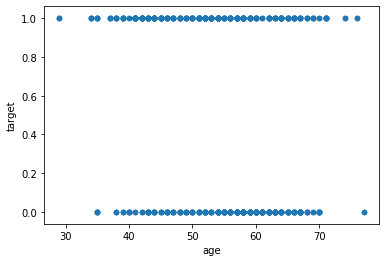

In [32]:
df.plot.scatter(x='age', y='target')

In [33]:
sb = SelectKBest()
x_train = sb.fit_transform(x_train,y_train.values.ravel())
x_test = sb.transform(x_test)

In [34]:
sb.get_support()

array([ True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True])

In [37]:
model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(10,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [38]:
batch_size = 32
es = EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)
callbacks = [es]
model.fit(x_train,y_train,epochs=50, batch_size=batch_size, callbacks=callbacks)

Train on 717 samples
Epoch 1/50
717/717 [==============================] - 0s 496us/sample - loss: 0.6697 - acc: 0.5941
Epoch 2/50
717/717 [==============================] - 0s 100us/sample - loss: 0.6419 - acc: 0.6499
Epoch 3/50
717/717 [==============================] - 0s 100us/sample - loss: 0.6107 - acc: 0.7015
Epoch 4/50
717/717 [==============================] - 0s 93us/sample - loss: 0.5682 - acc: 0.7587
Epoch 5/50
717/717 [==============================] - 0s 93us/sample - loss: 0.5219 - acc: 0.8006
Epoch 6/50
717/717 [==============================] - 0s 92us/sample - loss: 0.4863 - acc: 0.8089
Epoch 7/50
717/717 [==============================] - 0s 94us/sample - loss: 0.4555 - acc: 0.8117
Epoch 8/50
717/717 [==============================] - 0s 97us/sample - loss: 0.4331 - acc: 0.8201
Epoch 9/50
717/717 [==============================] - 0s 89us/sample - loss: 0.4166 - acc: 0.8201
Epoch 10/50
717/717 [==============================] - 0s 92us/sample - loss: 0.4065 - acc: 0.

In [39]:
model.evaluate(x_test,y_test)

308/308 [==============================] - 0s 334us/sample - loss: 0.3901 - acc: 0.8214


[0.3900619551732943, 0.8214286]

acc= 0.82
precision= 0.79
[[125  34]
 [ 21 128]]


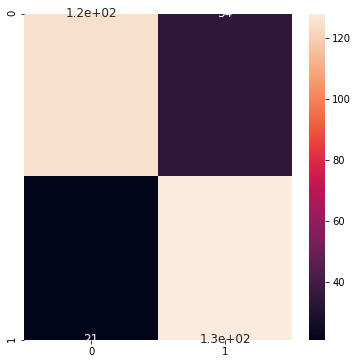

In [40]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print('acc=',round(accuracy_score(y_test,y_pred),2))
print('precision=',round(precision_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
cfm_plot(y_test,y_pred)

acc= 0.79
precision= 0.75
[[117  42]
 [ 22 127]]


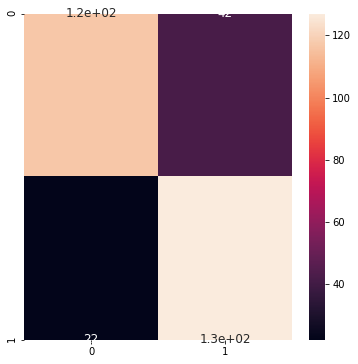

In [41]:
lr = LogisticRegression()
lr.fit(x_train,y_train.values.ravel())
y_pred = lr.predict(x_test)
print('acc=',round(accuracy_score(y_test,y_pred),2))
print('precision=',round(precision_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
cfm_plot(y_test,y_pred)

acc= 0.8
precision= 0.76
[[119  40]
 [ 22 127]]


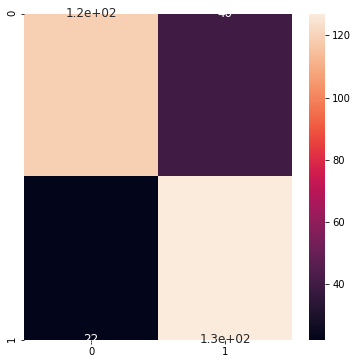

In [42]:
nb = GaussianNB()
nb.fit(x_train,y_train.values.ravel())
y_pred = nb.predict(x_test)
print('acc=',round(accuracy_score(y_test,y_pred),2))
print('precision=',round(precision_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
cfm_plot(y_test,y_pred)

acc= 1.0
precision= 1.0
[[159   0]
 [  0 149]]


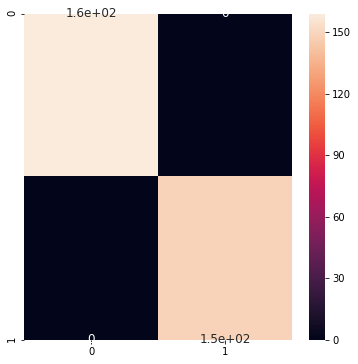

In [43]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train.values.ravel())
y_pred = rf.predict(x_test)
print('acc=',round(accuracy_score(y_test,y_pred),2))
print('precision=',round(precision_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
cfm_plot(y_test,y_pred)

acc= 0.9
precision= 0.87
[[138  21]
 [ 11 138]]


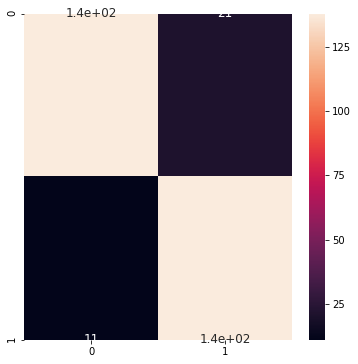

In [44]:
lr = LogisticRegression()
nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=20)
vc = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('nb', nb)],voting='soft')
vc.fit(x_train,y_train.values.ravel())
y_pred = vc.predict(x_test)
print('acc=',round(accuracy_score(y_test,y_pred),2))
print('precision=',round(precision_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
cfm_plot(y_test,y_pred)